In [1]:
# import datetime
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
from datlib.FRED import *
from datlib.plots import *
import pandas_datareader.data as web


#FRED.py
#. . . 
def bil_to_mil(series):
    return series* 10**3
# . . .
#fedProject.py
# . . .
data_codes  = {# Assets
               "Total Base": "BOGMBASE",
               "Currency in Circulation": "WCURCIR",
                "Required Reserves":"REQRESNS",
                "Vault Cash": "TLVAULTW",

               "Total Assets": "WALCL",
               "Unemployment Rate": "UNRATE",
               "CPI":"CPIAUCSL",
               "Core PCE":"PCEPILFE",
               "1 Month Treasury Rate": "DGS1MO",
               "3 Month Treasury Rate": "DGS3MO",               
               "1 Year Treasury Rate": "DGS1",
               "2 Year Treasury Rate": "DGS2",
               "10 Year Treasury Rate": "DGS10",
               "30 Year Treasury Rate": "DGS30",               
               "Effective Federal Funds Rate": "DFF",
               "Federal Funds Target Rate (Pre-crisis)":"DFEDTAR",
               "Federal Funds Upper Target":"DFEDTARU",
               "Federal Funds Lower Target":"DFEDTARL",
               "Interest on Excess Reserves": "IOER",
                "Interest on Reserves":"IORB"
               }
inflation_target = 2
unemployment_target = 4.5
# Select start and end dates
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime.today()
annual_div = {"Q":4,
             "W":52,
             "M":12}
last_month = 1
next_month = -1
next_year = -12

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days

if "data_gathered" not in locals():
    freq = "M"
    year = annual_div[freq]
# data = pd.read_parquet("FedDAGData.parquet.gzip")

    data = gather_data(data_codes, start, 
          end = end, freq = freq)
#     data.fillna(0, inplace=True)
    data["Interest on Reserves"] = data["Interest on Excess Reserves"].add(data["Interest on Reserves"])
    data["Interest on Reserves"].loc["2021-07-31"] = data["Interest on Excess Reserves"].loc["2021-07-31"]
    data["Currency in Circulation"] = data["Currency in Circulation"].mul(1000)
#     for key in data.keys():
#         data["Log " + key]= np.log(data[key])
    # Create new variables
    data_gathered = True



In [2]:
data

,Total Base,Currency in Circulation,Required Reserves,Vault Cash ($ Mil),Total Assets,Unemployment Rate,CPI,Core PCE,1 Month Treasury Rate,3 Month Treasury Rate,1 Year Treasury Rate,2 Year Treasury Rate,10 Year Treasury Rate,30 Year Treasury Rate,Effective Federal Funds Rate,Federal Funds Target Rate (Pre-crisis),Federal Funds Upper Target,Federal Funds Lower Target,Interest on Excess Reserves,Interest on Reserves
DATE,,,,,,,,,,,,,,,,,,,,
1980-01-31,156000.0,NaN,44.928,12167.60,NaN,6.3,78.000,39.095,NaN,NaN,12.057273,11.498182,10.802273,10.595000,13.816774,NaN,NaN,NaN,NaN,NaN
1980-02-29,153900.0,NaN,42.966,11084.25,NaN,6.3,79.000,39.485,NaN,NaN,13.922105,13.418421,12.414737,12.133158,14.126207,NaN,NaN,NaN,NaN,NaN
1980-03-31,155000.0,NaN,42.910,10708.00,NaN,6.3,80.100,39.851,NaN,NaN,15.817619,14.884762,12.749048,12.339048,17.192258,NaN,NaN,NaN,NaN,NaN
1980-04-30,157900.0,NaN,44.683,10853.00,NaN,6.9,80.900,40.056,NaN,NaN,13.299048,12.501905,11.473333,11.400000,17.607667,NaN,NaN,NaN,NaN,NaN
1980-05-31,157900.0,NaN,43.785,10971.00,NaN,7.5,81.700,40.378,NaN,NaN,9.389524,9.450000,10.181429,10.361429,10.983226,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,6388800.0,2194840.20,NaN,NaN,8418612.40,4.7,274.214,118.357,0.053810,0.041905,0.077143,0.240952,1.374762,1.935714,0.079333,NaN,0.25,0.0,NaN,NaN
2021-10-31,6331000.0,2202443.75,NaN,NaN,8516524.50,4.6,276.590,118.881,0.056000,0.052000,0.113000,0.392500,1.582500,2.059500,0.079032,NaN,0.25,0.0,NaN,NaN
2021-11-30,6394800.0,2211626.25,NaN,NaN,8648682.25,4.2,278.524,119.452,0.070500,0.051500,0.179000,0.508000,1.559500,1.935500,0.079667,NaN,0.25,0.0,NaN,NaN


In [3]:
pct_change_data = data.pct_change(12)
rates = list(data.keys())[6:]
for key in rates:
    pct_change_data[key] = data[key]
pct_change_data

,Total Base,Currency in Circulation,Required Reserves,Vault Cash ($ Mil),Total Assets,Unemployment Rate,CPI,Core PCE,1 Month Treasury Rate,3 Month Treasury Rate,1 Year Treasury Rate,2 Year Treasury Rate,10 Year Treasury Rate,30 Year Treasury Rate,Effective Federal Funds Rate,Federal Funds Target Rate (Pre-crisis),Federal Funds Upper Target,Federal Funds Lower Target,Interest on Excess Reserves,Interest on Reserves
DATE,,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,NaN,NaN,NaN,NaN,NaN,78.000,39.095,NaN,NaN,12.057273,11.498182,10.802273,10.595000,13.816774,NaN,NaN,NaN,NaN,NaN
1980-02-29,NaN,NaN,NaN,NaN,NaN,NaN,79.000,39.485,NaN,NaN,13.922105,13.418421,12.414737,12.133158,14.126207,NaN,NaN,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,80.100,39.851,NaN,NaN,15.817619,14.884762,12.749048,12.339048,17.192258,NaN,NaN,NaN,NaN,NaN
1980-04-30,NaN,NaN,NaN,NaN,NaN,NaN,80.900,40.056,NaN,NaN,13.299048,12.501905,11.473333,11.400000,17.607667,NaN,NaN,NaN,NaN,NaN
1980-05-31,NaN,NaN,NaN,NaN,NaN,NaN,81.700,40.378,NaN,NaN,9.389524,9.450000,10.181429,10.361429,10.983226,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,0.309100,0.083205,NaN,0.0,0.194405,-0.405063,274.214,118.357,0.053810,0.041905,0.077143,0.240952,1.374762,1.935714,0.079333,NaN,0.25,0.0,NaN,NaN
2021-10-31,0.287548,0.079523,NaN,0.0,0.193223,-0.333333,276.590,118.881,0.056000,0.052000,0.113000,0.392500,1.582500,2.059500,0.079032,NaN,0.25,0.0,NaN,NaN
2021-11-30,0.255606,0.075886,NaN,0.0,0.201521,-0.373134,278.524,119.452,0.070500,0.051500,0.179000,0.508000,1.559500,1.935500,0.079667,NaN,0.25,0.0,NaN,NaN


<AxesSubplot:xlabel='DATE'>

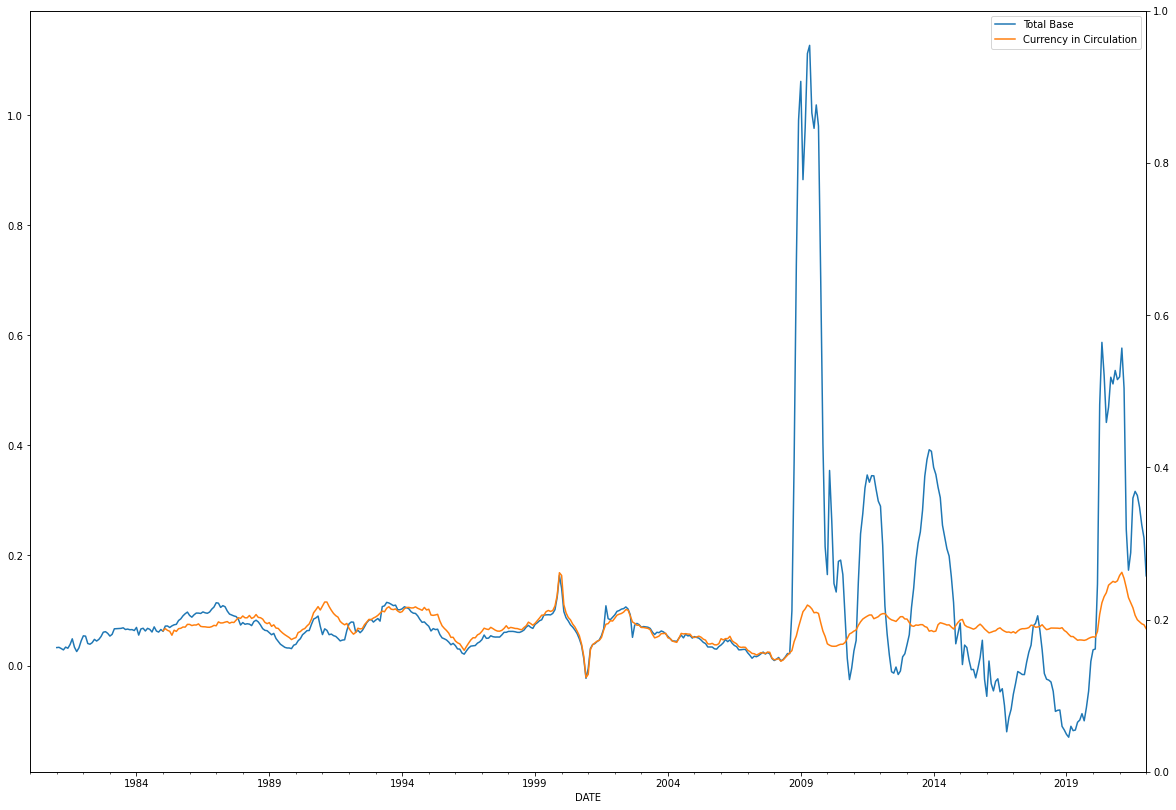

In [4]:
plot_vars = ["Total Base", "Currency in Circulation"]
fig, ax = plt.subplots(figsize = (20, 14))
ax2 = ax.twinx()
pct_change_data[plot_vars].plot.line(ax = ax)

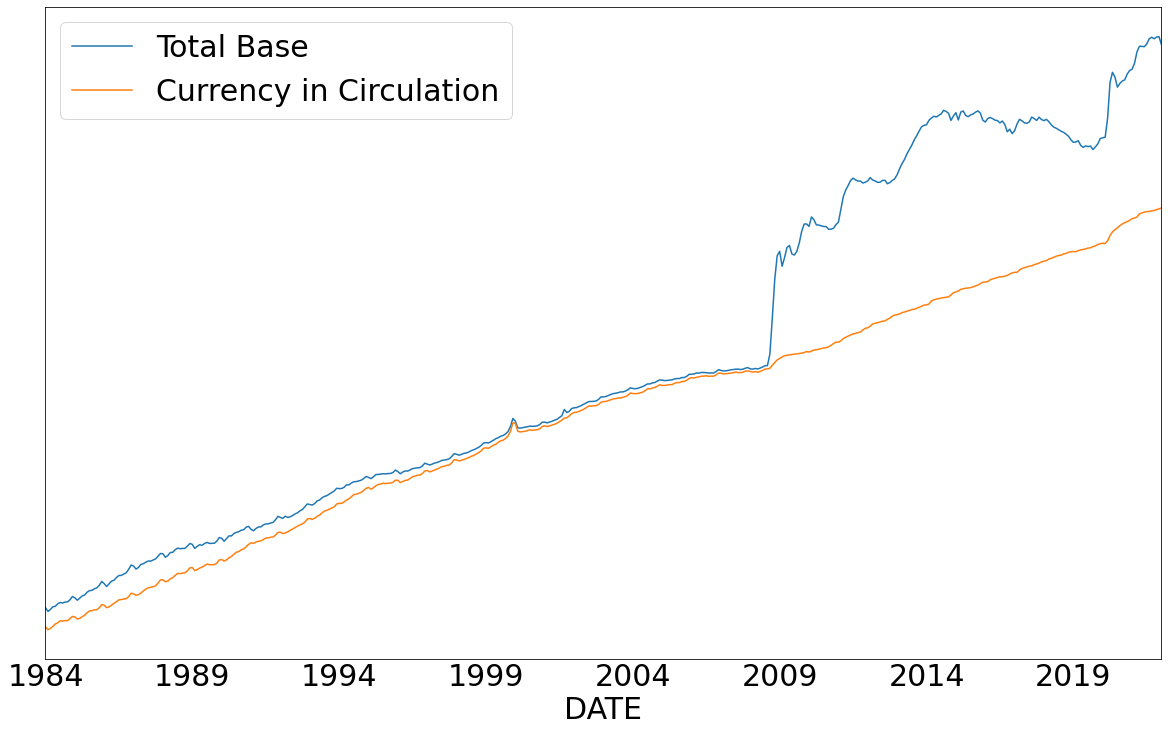

In [5]:
plt.rcParams.update({"font.size": 30})  
plot_vars = ["Total Base", "Currency in Circulation"]
fig, ax = plt.subplots(figsize = (20, 12))
data.loc["1984":,plot_vars].plot.line(logy = True, ax = ax)
ax.set_yticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

<AxesSubplot:xlabel='DATE'>

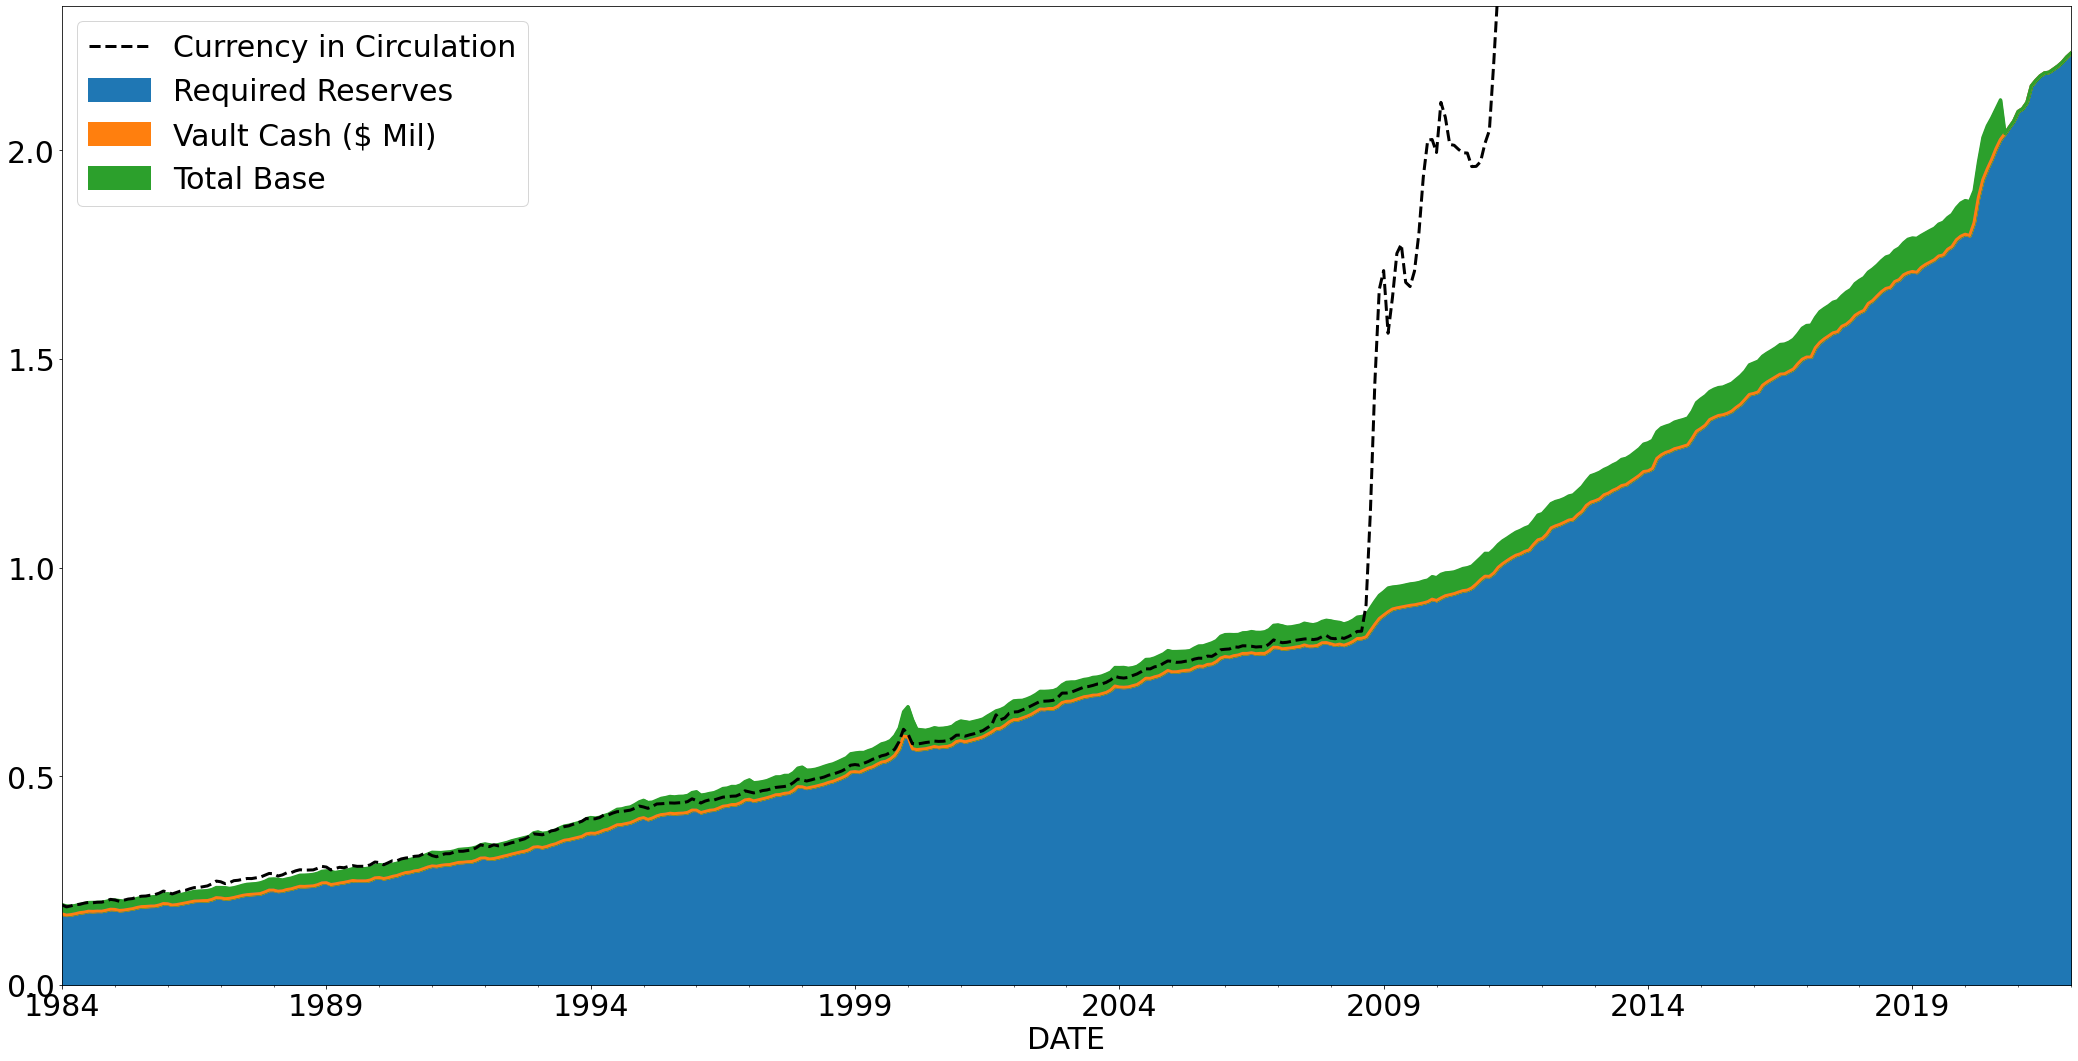

In [7]:
figsize= (36,18)
plot_data = data.loc["1984":].div(10**6)
account_vars = ["Currency in Circulation", "Required Reserves", "Vault Cash ($ Mil)"]

fig, ax = plt.subplots(figsize = figsize)
plot_data[account_vars].plot.area(stacked = True, linewidth = 3,
                            ax = ax, label = account_vars)
# change y vals from mil to tril
total_var = ["Total Base"]
plot_data[total_var].plot.line(linewidth = 3, 
                             ax = ax, c = "k",
                             label = total_var, ls = "--")


In [4]:
135 * 1000 / 10 + 50 * 10000 / 10

63500.0